In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
random.sample?

In [5]:
print(len(x), len(y))

1100 1100


In [6]:
for i in range(len(x)):
    print(x[i], y[i])

718502361 1437004734
290345422 580690856
513105628 1026211268
203417776 406835564
901419890 1802839792
952692943 1905385898
513697340 1027394692
295898521 591797054
61478719 122957450
279815584 559631180
277428476 554856964
596163908 1192327828
187911894 375823800
351904382 703808776
515168935 1030337882
452457435 904914882
821787562 1643575136
3945739 7891490
145627683 291255378
643610860 1287221732
950474063 1900948138
228750482 457500976
599256642 1198513296
527535817 1055071646
941559972 1883119956
713048226 1426096464
3303051 6606114
300821086 601642184
219324515 438649042
909226079 1818452170
229868122 459736256
668164732 1336329476
590500662 1181001336
378712738 757425488
360863997 721728006
684156920 1368313852
347281245 694562502
17621320 35242652
283820438 567640888
922136206 1844272424
34336683 68673378
847993733 1695987478
911993320 1823986652
241271357 482542726
573304910 1146609832
217798831 435597674
75727328 151454668
744793280 1489586572
73128887 146257786
112314208 22

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
x

array([718502361, 290345422, 513105628, ..., 960777653, 826902000,
       518715898])

In [9]:
y

array([1437004734,  580690856, 1026211268, ..., 1921555318, 1653804012,
       1037431808])

In [10]:
u = x.mean()
std = x.std()

In [11]:
std

292046354.7448456

In [12]:
x = (x - u)/std

In [13]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

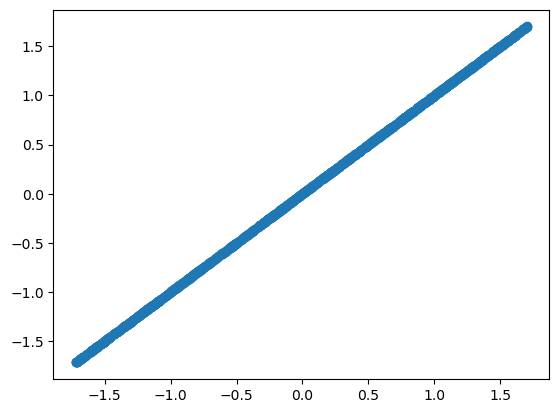

In [14]:
plt.scatter(x, y)

In [15]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) 0.7400531989198975 0.7400531989198975


In [16]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [17]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [18]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [19]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    theta_list = []
        
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append([theta[0], theta[1]])
        
    return theta, cost_epoch, theta_list

In [20]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [21]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [22]:
theta, cost_epoch, theta_list = gradient_descent(x, y, learning_rate=0.03)

In [23]:
theta

array([4.28823643e-18, 9.52447492e-01])

In [24]:
cost_epoch

[1.0000000000000007,
 0.940899999999999,
 0.8852928099999995,
 0.8329720049289997,
 0.7837433594376954,
 0.7374241268949291,
 0.6938423609954377,
 0.6528362774606076,
 0.6142536534626861,
 0.5779512625430415,
 0.5437943429267472,
 0.5116560972597768,
 0.4814172219117247,
 0.4529654640967414,
 0.4261952051686237,
 0.4010070685431576,
 0.37730755079225686,
 0.35500867454043455,
 0.3340276618750951,
 0.3142866270582772,
 0.29571228739913274,
 0.2782356912138441,
 0.2617919618631056,
 0.2463200569169961,
 0.2317625415532018,
 0.21806537534740736,
 0.20517771166437562,
 0.19305170890501105,
 0.18164235290872494,
 0.17090728985181916,
 0.16080666902157673,
 0.1513029948824018,
 0.14236098788485166,
 0.13394745350085704,
 0.12603115899895637,
 0.11858271750211806,
 0.11157447889774291,
 0.10498042719488637,
 0.0987760839476684,
 0.09293841738636124,
 0.0874457569188275,
 0.08227771268492466,
 0.07741509986524567,
 0.07283986746320963,
 0.06853503129613393,
 0.06448461094653242,
 0.06067357043

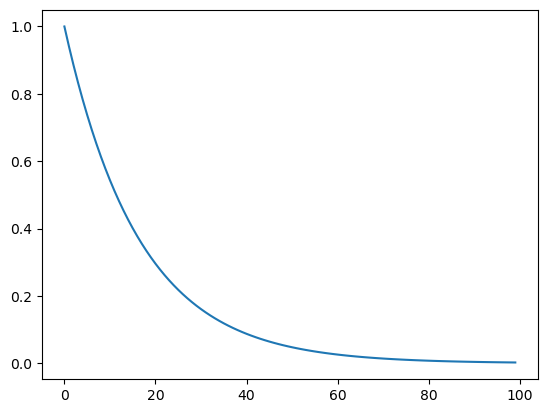

In [25]:
plt.plot(cost_epoch)

In [ ]:
y_p = theta[0] + theta[1]*X_test

In [ ]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

In [ ]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [ ]:
R2_score(Y_test, y_p)

In [ ]:
# Examples of meshgrid

In [ ]:
a = np.array([5,4,3,2,1])
b = np.array([30,60,80,90,10,30,50,10])

In [ ]:
a, b = np.meshgrid(a, b)

In [ ]:
print(a.shape, b.shape)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(a, b, a+b, cmap = 'coolwarm')
plt.show()

In [ ]:
a = np.arange(-1, 1, 0.02)
b = a
a, b = np.meshgrid(a, b)

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

In [ ]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')

In [ ]:
theta_list = np.array(theta_list)

In [ ]:
plt.plot(theta_list[:, 0], label='Theta_0')
plt.plot(theta_list[:, 1], label='Theta_1')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1], cost_epoch, color='red')
plt.show()